In [9]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_train = pd.read_csv('task1_train_data.csv')
data_test = pd.read_csv('task1_test_data.csv')
data_train.head()
data_test.head()

,x_d,y_d
0,33.8465,59.3003
1,58.5384,119.9220
2,87.8723,194.7350
3,124.8290,266.9400
4,184.6340,327.4480


In [10]:
#variables assignment
x_train = data_train['x_d']
x_test = data_test['x_d']
y_train = data_train['y_d']
y_test = data_test['y_d']
y_test.head()

0     59.3003
1    119.9220
2    194.7350
3    266.9400
4    327.4480
Name: y_d, dtype: float64

Text(0.5, 1.0, 'data')

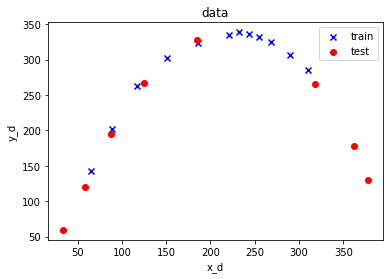

In [11]:
#visualization
fig1 = plt.figure()
train = plt.scatter(x_train, y_train, c='b', marker='x',label='train')
test = plt.scatter(x_test, y_test, c='r', marker='o',label='test')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.title('data')

In [12]:
#Linear Regression model (build and train)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
# from here, we can see the error
# so we should reshape the data

ValueError: Expected 2D array, got 1D array instead:
array=[232.274   64.8744  88.8854 116.517  151.444  186.415  221.413  243.149
 255.235  268.538  290.321  309.698 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)
y_train = np.array(y_train)
y_train= y_train.reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [15]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [16]:
#predict
y_train_pre = linear_model.predict(x_train)
y_test_pre = linear_model.predict(x_test)


In [17]:
#assess the performance
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pre)
r2_test = r2_score(y_test, y_test_pre)
print('r2 score of train data: %f \nr2 score of test data : %f'%(r2_train,r2_test))
#minus value means it is very bad

r2 score of train data: 0.575625 
r2 score of test data : -1.655372


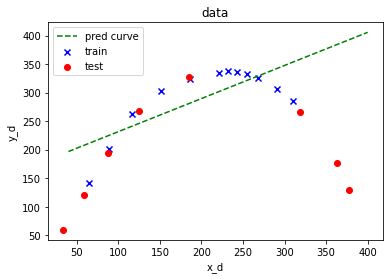

In [29]:
#visulize the result
x_range = np.linspace(40, 400, 300).reshape(-1,1)
y_range_pred = linear_model.predict(x_range)
#visualization
fig2 = plt.figure()
train = plt.scatter(x_train, y_train, c='b', marker='x',label='train')
test = plt.scatter(x_test, y_test, c='r', marker='o',label='test')
model = plt.plot(x_range, y_range_pred,'--',c='g',label='pred curve')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.title('data')
plt.draw()

In [30]:
#生成二阶属性函数
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=2)#二阶
x_train_p = poly_model.fit_transform(x_train)
x_test_p = poly_model.fit_transform(x_test)

In [40]:
# new model


from sklearn.linear_model import LinearRegression
linear_model2 = LinearRegression()
linear_model2.fit(x_train_p, y_train)

LinearRegression()

In [41]:
y_train_pre_p = linear_model.predict(x_train_p)
y_test_pre_p = linear_model.predict(x_test_p)

#assess the performance
from sklearn.metrics import r2_score
r2_train_p = r2_score(y_train, y_train_pre_p)
r2_test_p = r2_score(y_test, y_test_pre_p)
print('r2 score of train data: %f \nr2 score of test data : %f'%(r2_train_p,
                                                                 r2_test_p))
#minus value means it is very bad

r2 score of train data: 0.995473 
r2 score of test data : 0.973853


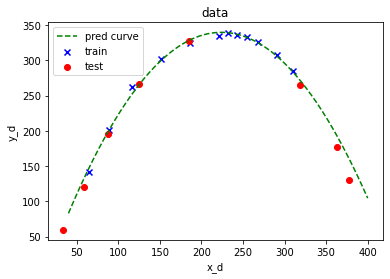

In [42]:
#visulize the result
x_range = np.linspace(40, 400, 300).reshape(-1,1)
x_range2 = poly_model.transform(x_range)
y_range_pred2 = linear_model2.predict(x_range2)
#visualization
fig3 = plt.figure()
train = plt.scatter(x_train, y_train, c='b', marker='x',label='train')
test = plt.scatter(x_test, y_test, c='r', marker='o',label='test')
model_p = plt.plot(x_range, y_range_pred2,'--',c='g',label='pred curve')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.title('data')
plt.draw()